In [32]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [33]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'
checkpoints_dir = f'{engram_dir}checkpoints/'
tensorboard_dir = f'{engram_dir}tensorboard/'

In [34]:
plot_ci = True

hyper_Babble2Spkr_snr0.0_FFstart


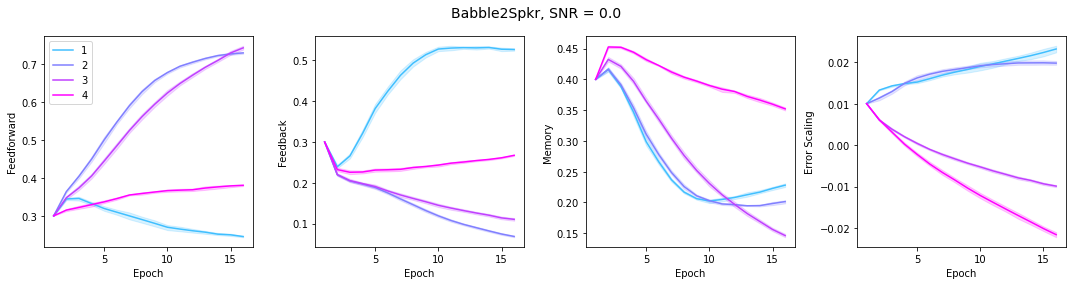




hyper_AudScene_snr-3.0_FFstart


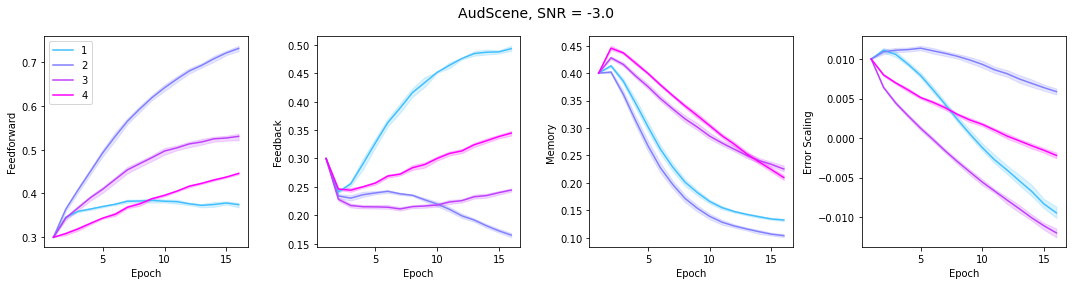




hyper_Babble8Spkr_snr-3.0_FFstart


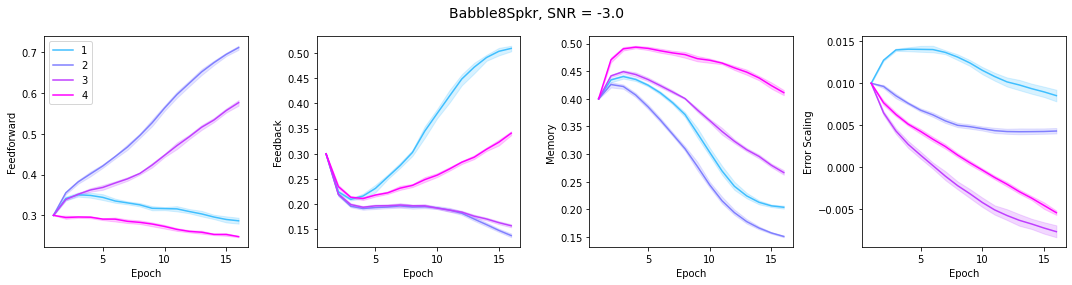




hyper_Babble8Spkr_snr-9.0_FFstart


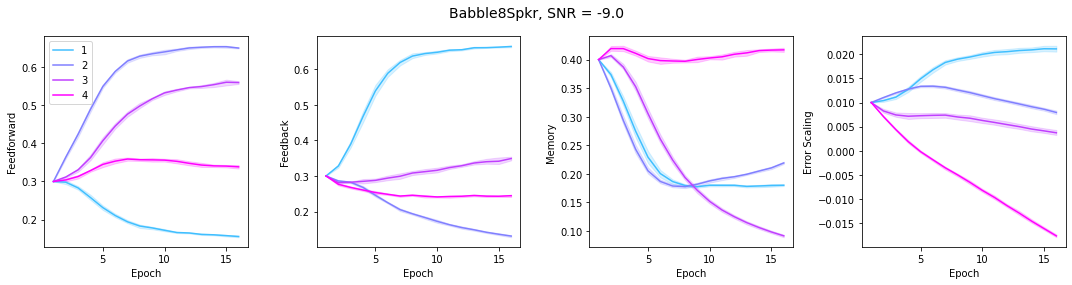




hyper_SpeakerShapedNoise_snr0.0_FFstart


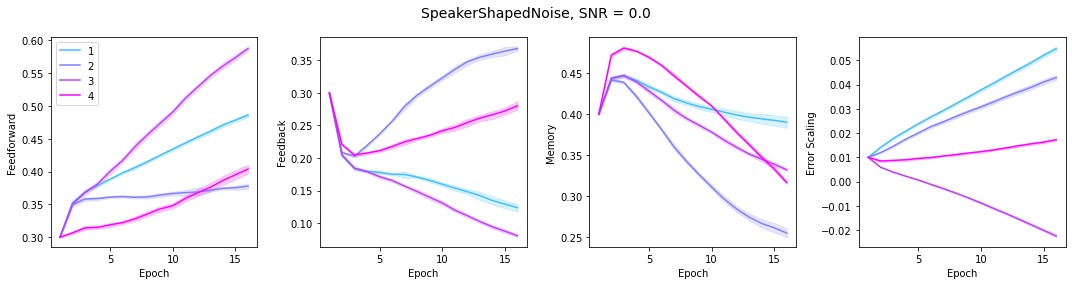




hyper_SpeakerShapedNoise_snr-6.0_FFstart


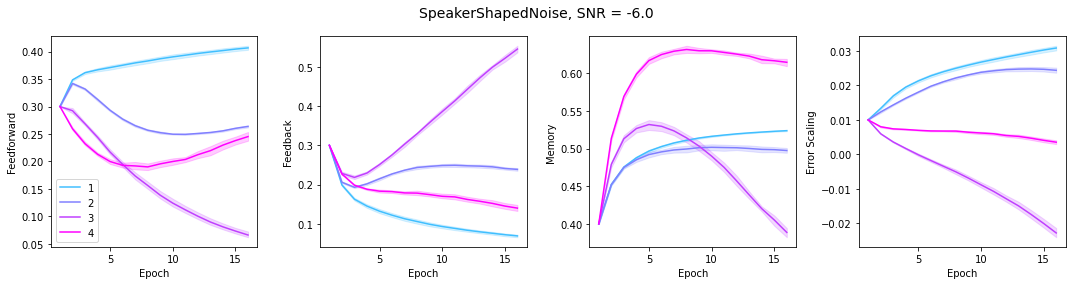




hyper_SpeakerShapedNoise_snr-3.0_FFstart


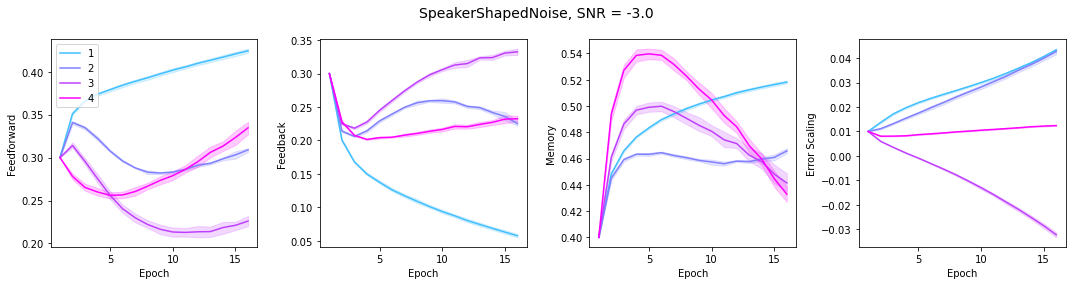




hyper_AudScene_snr-6.0_FFstart


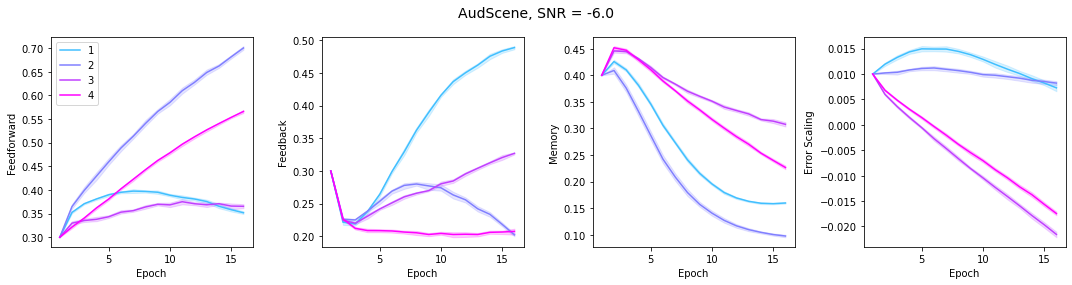




hyper_Babble2Spkr_snr3.0_FFstart


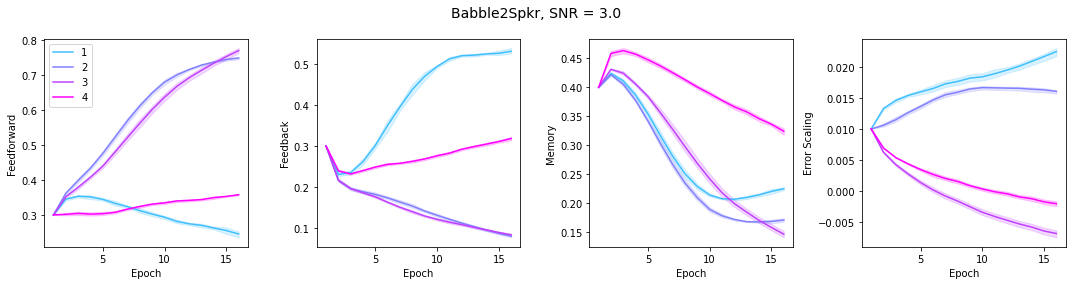




hyper_Babble2Spkr_snr-9.0_FFstart


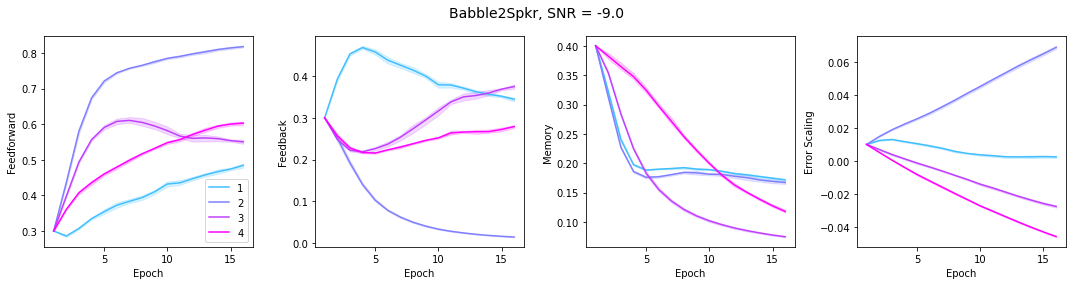




hyper_AudScene_snr0.0_FFstart


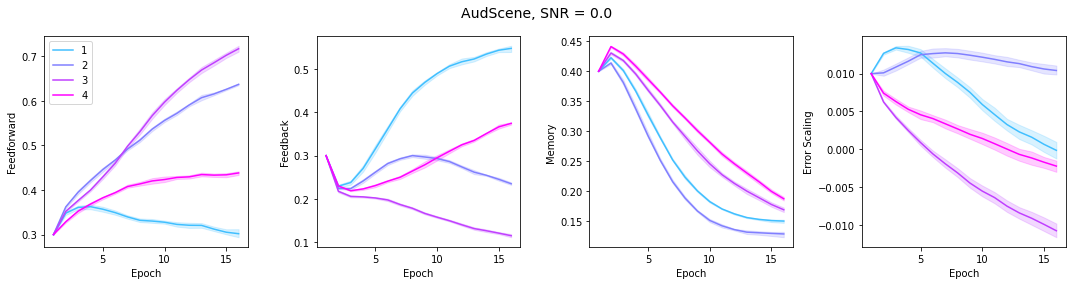




hyper_SpeakerShapedNoise_snr3.0_FFstart


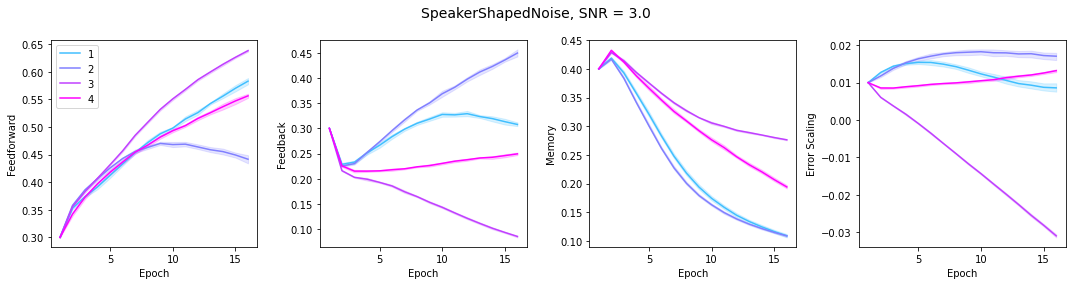




hyper_Babble8Spkr_snr-6.0_FFstart


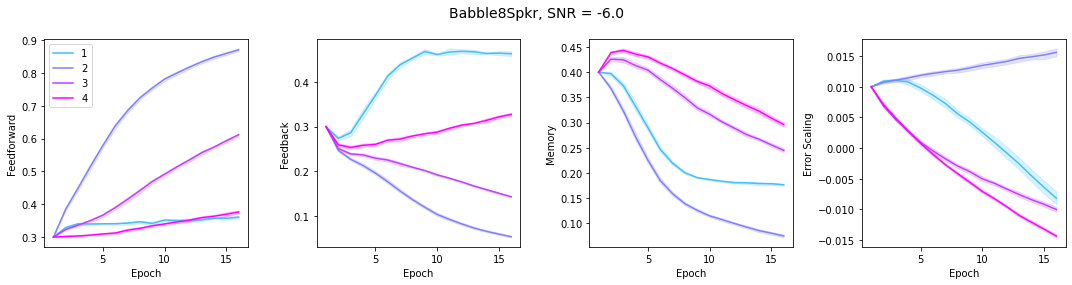




hyper_AudScene_snr-9.0_FFstart


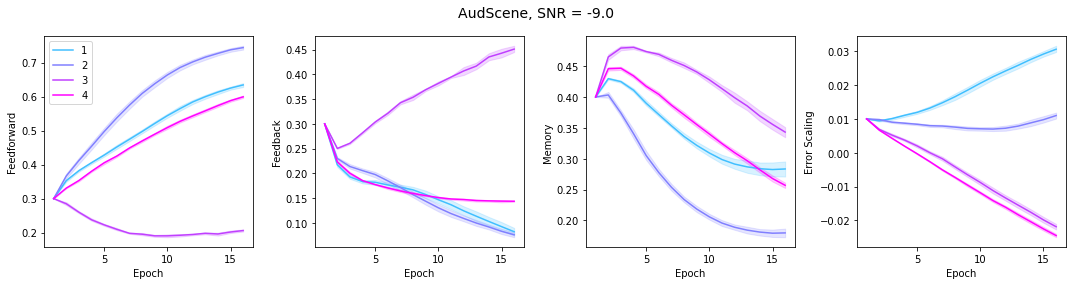




hyper_Babble2Spkr_snr-6.0_FFstart


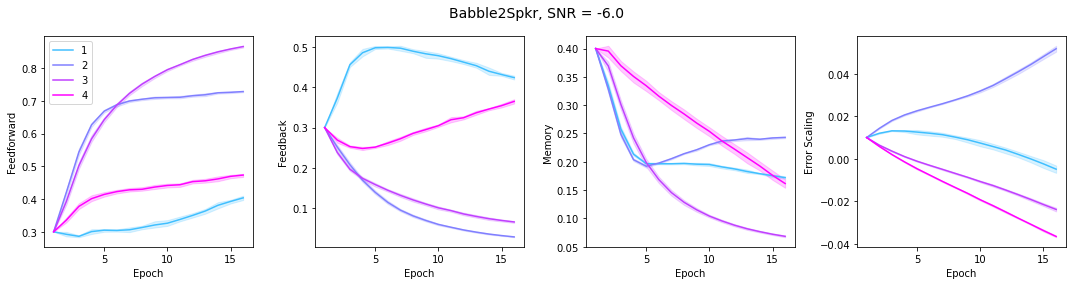




hyper_AudScene_snr3.0_FFstart


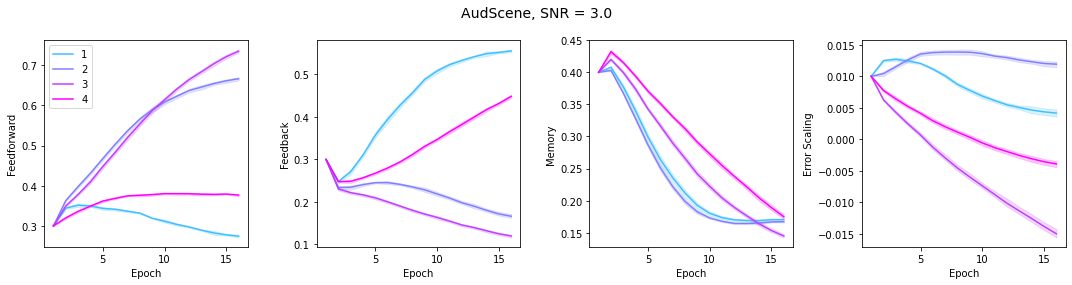




hyper_SpeakerShapedNoise_snr-9.0_FFstart


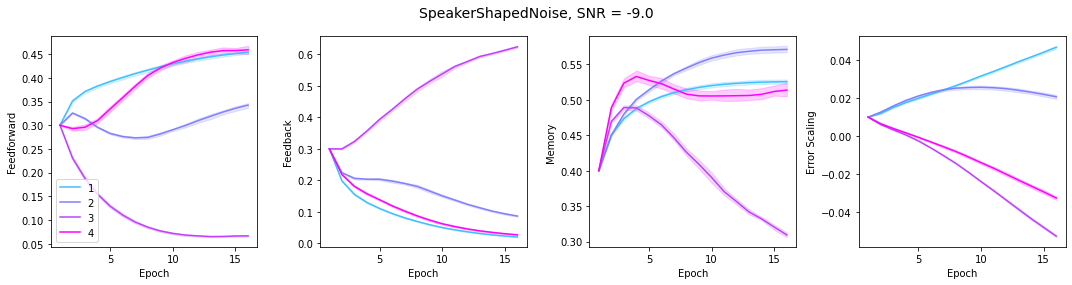




hyper_Babble8Spkr_snr0.0_FFstart


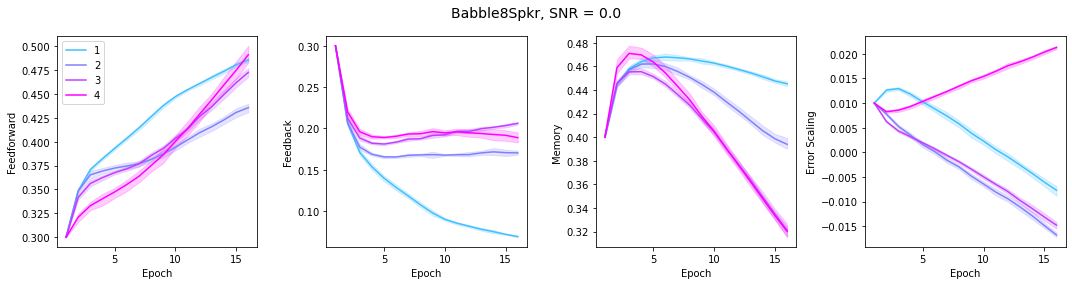




hyper_Babble2Spkr_snr-3.0_FFstart


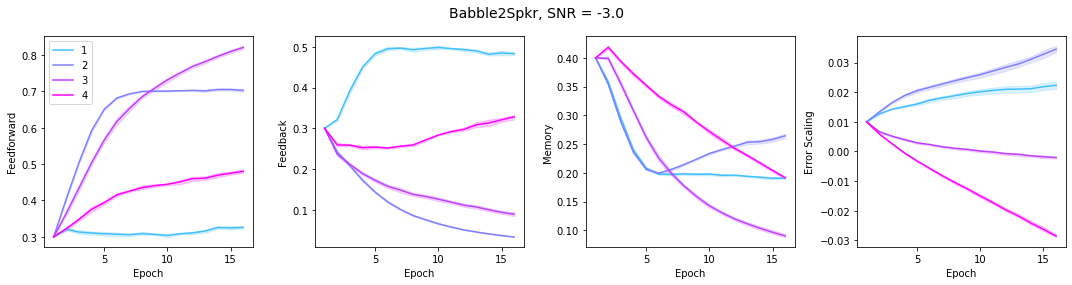




hyper_Babble8Spkr_snr3.0_FFstart


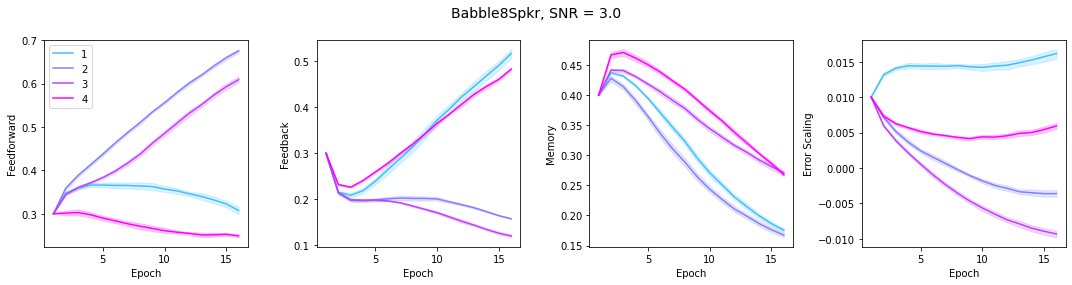

In [35]:
for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    print("====================")
    print(tfdir)
    print("====================")
    noise_info = tfdir.split('_')
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
        
    # Collect hyperparameters
    feedforward = []
    feedback = []
    memory = []
    error_scaling = []
    layer = []
    epoch = []
    iteration = []
    
    for _iter, tfdir_file in enumerate(tfdir_files):
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        for i in range(1, 6):
            try:
                _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedforward")]
            except:
                continue
            _feedback = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_feedback")]
            _memory = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_memory")]
            _error_scaling = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{i}_error")]
            feedforward.extend(_feedforward)
            feedback.extend(_feedback)
            memory.extend(_memory)
            error_scaling.extend(_error_scaling)
            layer.extend([i]*len(_feedforward))
            epoch.extend([e+1 for e in range(len(_feedforward))])
            iteration.extend([_iter]*len(_feedforward))

    # Make pandas dataframe
    df = pd.DataFrame({
        'Feedforward': feedforward,
        'Feedback': feedback,
        'Memory': memory,
        'Error Scaling': error_scaling,
        'Layer': layer,
        'Epoch': epoch,
        'Iteration': iteration
        })
    
    fig, axs = plt.subplots(1, 4, figsize = (15,4))
    colors = plt.cm.cool(np.linspace(0,1,5))
    for layer in range(5):
        sns.lineplot(
            x='Epoch', y='Feedforward',
            color=colors[layer], ax=axs[0],
            data=df[df['Layer']==layer], label=layer
            )
        sns.lineplot(
            x='Epoch', y='Feedback',
            color=colors[layer], ax=axs[1],
            data=df[df['Layer']==layer]
            )
        sns.lineplot(
            x='Epoch', y='Memory',
            color=colors[layer], ax=axs[2],
            data=df[df['Layer']==layer]
            )
        sns.lineplot(
            x='Epoch', y='Error Scaling',
            color=colors[layer], ax=axs[3],
            data=df[df['Layer']==layer]
            )
    plt.suptitle(f'{noise_info[1]}, SNR = {noise_info[2][3:]}', fontsize=14)
    plt.tight_layout()
    plt.show()
    print('\n\n')
